Here is a rewritten, comprehensive project description for your Twitter sentiment analysis project, adapted to be a structured, step-by-step guide for a data scientist. It emphasizes the progression from a binary to a multiclass classifier and outlines the rationale behind each step.

## 📊 Twitter Sentiment Analysis: A Multi-Stage NLP Project

This project focuses on building a robust Natural Language Processing (NLP) model to classify the sentiment of tweets about Apple and Google products. We'll approach this as an iterative process, starting with a simple binary classification and advancing to a more complex multiclass solution.

---

### **1. Business Problem & Project Goals** 🎯

Our primary goal is to create an automated system that can quickly and accurately gauge public opinion about major tech brands from social media data. The delivered model will enable businesses to monitor brand perception in real-time and make **data-driven decisions** in marketing, product development, and public relations.

**Key Deliverables:**

* A well-documented, reproducible NLP pipeline.
* A binary classification model (Positive vs. Negative).
* A multiclass classification model (Positive, Negative, and Neutral).
* A clear analysis of model performance and business-relevant insights.

---

### **2. Data Preparation & Cleaning** 🧹

Raw text data is inherently messy and requires careful cleaning before it can be used for modeling. The cleaning process transforms noise into valuable features.

**Core Cleaning Steps:**

1.  **Standardization:** Convert all text to lowercase to ensure uniformity.
2.  **Noise Removal:** Use regular expressions to strip out irrelevant elements like URLs, user mentions (`@username`), and hashtags (`#`).
3.  **Tokenization:** Break down the cleaned text into individual words or "tokens."
4.  **Stemming or Lemmatization:** Reduce words to their root form. **Lemmatization** is generally preferred as it converts words to their meaningful base form (e.g., "running" becomes "run"), which preserves more semantic context than stemming.
5.  **Stop Word Removal:** Eliminate common, low-information words (e.g., "the," "is") that do not contribute to sentiment.

---

### **3. Feature Engineering** 🛠️

Machine learning models require numerical input. This step is about converting our cleaned text tokens into a numerical representation.

**Vectorization Techniques:**

* **TF-IDF (Term Frequency-Inverse Document Frequency):** This is a highly effective method for text classification. It assigns a numerical score to each word that reflects its importance in a single tweet relative to the entire dataset. This method helps to down-weigh common words and highlight unique, important words that are crucial for sentiment detection.
* **N-grams:** Beyond single words, we will consider using n-grams (e.g., bigrams, trigrams). This captures the sentiment of multi-word phrases like **"not good"** or **"loved it,"** which a simple bag-of-words approach would miss.

---

### **4. Model Building: From Binary to Multiclass** 📈

This is the central part of the project, where we progressively build and refine our models.

#### **Stage 1: Binary Classification (Positive vs. Negative)**

* **Data Subset:** Filter the dataset to include only "positive" and "negative" tweets.
* **Model Selection:** We will start with a simple yet powerful algorithm, such as **Logistic Regression** or **Naive Bayes**. These models are excellent baselines for text classification and are highly interpretable.
* **Pipeline Creation:** We'll use a `scikit-learn` pipeline to combine our TF-IDF vectorizer and our classifier. This ensures a clean workflow and prevents data leakage.

#### **Stage 2: Multiclass Classification (Positive, Negative, and Neutral)**

* **Data Extension:** Re-introduce the "neutral" tweets to the dataset.
* **Model Adaptation:** The same classification algorithms can be used for multiclass problems.
* **Evaluation Focus:** Multiclass problems are more complex. While accuracy gives a general idea of performance, it's not enough.

---

### **5. Evaluation & Business-Informed Metrics** 📊

Evaluation is the most critical stage. The choice of metrics must be guided by the business problem.

#### **Choosing the Right Metrics:**

* **F1-Score (Macro Average):** This is the key metric for your project. A **macro-averaged F1-score** calculates the F1-score for each class independently and then takes the average. This is vital for imbalanced datasets because it gives equal weight to all classes, preventing the model from performing well on a majority class while ignoring a minority class. This aligns with our business goal of understanding sentiment across all three categories, not just the most common one.
* **Confusion Matrix:** This visual tool will show us exactly where our model is making mistakes (e.g., misclassifying a "negative" tweet as "neutral"). This helps us understand which misclassifications are most problematic. For example, misclassifying a negative review as positive is far more costly than classifying it as neutral.

---

### **6. Insights & Conclusion** 📝

The final phase involves interpreting our model's performance and translating it into actionable business intelligence. We'll analyze common terms and phrases associated with each sentiment and provide concrete recommendations for Apple and Google based on our findings. The ultimate deliverable is a proof-of-concept that demonstrates the power of NLP for real-time sentiment analysis.

In [45]:
# Core libraries
import pandas as pd
import numpy as np
import re
import string

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Sklearn - ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Persistence
import joblib
from pathlib import Path

# Ensure NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
# Load dataset
file_path = r"data\judge-1377884607_tweet_product_company.csv"

# Try ISO-8859-1 (common fallback for these datasets)
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Basic dataset info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Display first few rows
df.head()

Dataset shape: (9093, 3)

Columns: ['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Perfect ✅ The dataset has **9,093 tweets** and the 3 key columns we expected:

* **`tweet_text`** → the actual tweet content (our input features).
* **`emotion_in_tweet_is_directed_at`** → the entity/brand mentioned (Apple, Google, iPhone, etc.).
* **`is_there_an_emotion_directed_at_a_brand_or_product`** → the sentiment label (Positive, Negative, Neutral, etc.).

---

## 🧹 Step 2: Focus on Relevant Brands (Apple & Google)

### 🔎 Explanation

* The dataset covers multiple products/brands, but our project goal is **Apple vs Google**.
* We need to:

  1. **Map related terms** (e.g., "iPhone", "iPad", "MacBook" → Apple; "Android", "Nexus" → Google).
  2. Keep only those rows.
  3. Normalize the `is_there_an_emotion_directed_at_a_brand_or_product` column into simpler labels:

     * `positive`
     * `negative`
     * `neutral`

---


In [47]:
# Start fresh
df_clean = df.copy()

# Mapping from entity column
apple_entities = [
    "Apple", "iPhone", "iPad", "iPad or iPhone App", "Other Apple product or service"
]
google_entities = [
    "Google", "Android", "Android App", "Other Google product or service"
]

def map_brand_from_entity(entity):
    if pd.isna(entity):
        return None
    if entity in apple_entities:
        return "Apple"
    elif entity in google_entities:
        return "Google"
    else:
        return None

df_clean["brand"] = df_clean["emotion_in_tweet_is_directed_at"].apply(map_brand_from_entity)

# --- Fallback: detect brand in tweet text ---
apple_keywords = ["apple", "iphone", "ipad", "mac", "ipod", "ios", "imac", "macbook"]
google_keywords = ["google", "android", "nexus", "pixel", "gmail", "youtube", "chrome"]

def detect_brand_from_text(text):
    text = str(text).lower()
    for kw in apple_keywords:
        if kw in text:
            return "Apple"
    for kw in google_keywords:
        if kw in text:
            return "Google"
    return None

# Fill missing brands from tweet text
df_clean.loc[df_clean["brand"].isna(), "brand"] = df_clean.loc[
    df_clean["brand"].isna(), "tweet_text"
].apply(detect_brand_from_text)

# Drop rows that still have no brand
df_clean = df_clean.dropna(subset=["brand"])

print("Remaining rows after entity + text detection:", df_clean.shape)

# Normalize sentiment labels
def normalize_sentiment(label):
    if "Positive" in label:
        return "positive"
    elif "Negative" in label:
        return "negative"
    else:
        return "neutral"

df_clean["sentiment"] = df_clean[
    "is_there_an_emotion_directed_at_a_brand_or_product"
].apply(normalize_sentiment)

# Sentiment distribution check
print("\nSentiment counts:")
print(df_clean["sentiment"].value_counts())

df_clean.head(10)


Remaining rows after entity + text detection: (8338, 4)

Sentiment counts:
sentiment
neutral     4804
positive    2965
negative     569
Name: count, dtype: int64


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,positive
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product,Apple,neutral
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion,Google,positive
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion,Apple,positive
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,Apple,positive
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion,Google,positive



### ✅ What we have so far:

* Input text: **`tweet_text`**
* Target brand: **`brand`** (Apple / Google)
* Sentiment label: **`sentiment`** (positive / negative / neutral)

Class distribution:

* **Neutral:** 4,804
* **Positive:** 2,965
* **Negative:** 569

---

## **3. Text Preprocessing & Tokenization** 🧹

Cleaning and tokenizing text is the foundation of any NLP pipeline. The goal is to transform raw, noisy tweets into structured tokens that preserve sentiment while removing irrelevant details.

### **Challenges in Sentiment Tweets**

* **Negations**: Phrases like *“can not wait”* must be preserved as **“not\_wait”**; otherwise, the sentiment flips.
* **Product Identifiers**: Phrases like *“iPhone 3G”* or *“iPad 2”* are meaningful and shouldn’t be stripped away.
* **Noise**: Hashtags, mentions, and punctuation often don’t add value and can safely be removed.

---

### **Our Tokenization Approach** 🎯

We designed a **custom word-level tokenizer** that:

1. Converts text to lowercase for consistency.
2. Removes URLs, mentions (`@username`), and hashtags (`#`).
3. Preserves **negation phrases** as single tokens (e.g., `"can't wait"` → `not_wait`).
4. Removes stopwords while **keeping negations**.
5. Lemmatizes tokens to their root form (`stations` → `station`).
6. Keeps product numbers and meaningful terms (`iPad 2`, `iPhone 3G`).

---


In [48]:
# Regex pattern: allow words with letters, numbers, and apostrophes
token_pattern = re.compile(r"\b[a-zA-Z0-9][a-zA-Z0-9']*\b")

stop_words = set(stopwords.words("english")) - {"not", "no", "nor"}  
# keep negation words

def custom_tokenizer(text):
    # Lowercase
    text = str(text).lower()
    
    # Remove URLs and mentions
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    
    # Remove hashtags (#love → love)
    text = re.sub(r"#", "", text)
    
    # Extract tokens (words, numbers, contractions)
    tokens = token_pattern.findall(text)
    
    # Handle negations: join "not X" into "not_x"
    processed_tokens = []
    skip_next = False
    for i, tok in enumerate(tokens):
        if skip_next:
            skip_next = False
            continue
        if tok == "not" and i+1 < len(tokens):
            processed_tokens.append(f"not_{tokens[i+1]}")
            skip_next = True
        else:
            processed_tokens.append(tok)
    
    # Remove stopwords and lemmatize
    tokens = [
        lemmatizer.lemmatize(t) 
        for t in processed_tokens 
        if t not in stop_words and len(t) > 1
    ]
    
    return tokens

# Test examples
ex1 = ".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I can't wait to upgrade."
ex2 = "@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW."

print("Example 1:", custom_tokenizer(ex1))
print("Example 2:", custom_tokenizer(ex2))

# Apply updated tokenizer to dataset
df_clean["tokens"] = df_clean["tweet_text"].apply(custom_tokenizer)
df_clean["text_clean"] = df_clean["tokens"].apply(lambda x: " ".join(x))

df_clean[["tweet_text", "text_clean"]].head(10)


Example 1: ['3g', 'iphone', 'hr', 'tweeting', 'dead', "can't", 'wait', 'upgrade']
Example 2: ['not_wait', 'ipad', 'also', 'sale', 'sxsw']


,tweet_text,text_clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,3g iphone hr tweeting dead need upgrade plugin...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,not_wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope year's festival crashy year's iphone app ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps speechtherapy communication show...
7,"#SXSW is just starting, #CTIA is around the co...",sxsw starting ctia around corner googleio hop ...
8,Beautifully smart and simple idea RT @madebyma...,beautifully smart simple idea rt wrote hollerg...
9,Counting down the days to #sxsw plus strong Ca...,counting day sxsw plus strong canadian dollar ...
10,Excited to meet the @samsungmobileus at #sxsw ...,excited meet sxsw show sprint galaxy still run...


Total tokens: 96576
Unique tokens: 8482
Type-Token Ratio (TTR): 0.088

Top 20 words:
sxsw: 8824
link: 3625
rt: 2681
ipad: 2505
google: 2479
apple: 2237
quot: 1586
iphone: 1576
store: 1506
new: 1051
austin: 901
app: 782
amp: 744
circle: 676
launch: 659
social: 632
pop: 595
android: 587
today: 528
network: 462


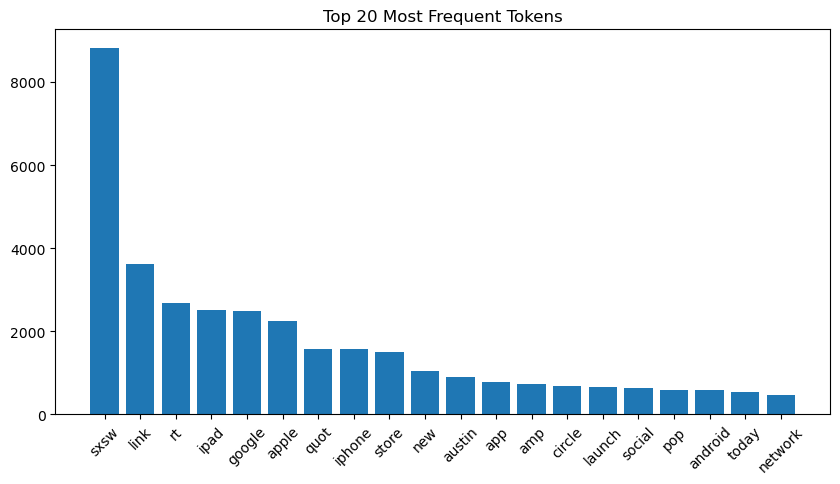

In [49]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Flatten all tokens from our custom tokenizer
all_tokens = [tok for text in df_clean["tweet_text"] for tok in custom_tokenizer(text)]

# Basic corpus stats
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))
ttr = unique_tokens / total_tokens

print("Total tokens:", total_tokens)
print("Unique tokens:", unique_tokens)
print("Type-Token Ratio (TTR):", round(ttr, 3))

# Frequency distribution
freq_dist = Counter(all_tokens)

# Top 20 words
top20 = freq_dist.most_common(20)
print("\nTop 20 words:")
for word, count in top20:
    print(f"{word}: {count}")

# Plot frequency distribution
words, counts = zip(*top20)
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Tokens")
plt.xticks(rotation=45)
plt.show()



## **4. Feature Engineering: TF-IDF + N-Grams** 🛠️

Now that we have a clean, sentiment-preserving tokenizer, the next step is to convert our tokens into numerical features that a machine learning model can understand.

### **Why TF-IDF?**

* **TF-IDF (Term Frequency – Inverse Document Frequency)** assigns higher weights to words that are frequent in a document but rare across the dataset.
* This helps downweight overly common words (like *“phone”*) and highlight more informative ones (like *“not\_wait”* or *“love”*).

### **Why N-Grams?**

* **Unigrams**: Capture individual words (`good`, `bad`, `upgrade`).
* **Bigrams**: Capture short phrases (`not_good`, `very_happy`) that often carry sentiment more strongly than single words.
* Using both (n=1,2) balances **breadth (unigrams)** with **context (bigrams)**.

---

### **Implementation Plan**

1. Use **scikit-learn’s `TfidfVectorizer`**.
2. Pass in our **custom tokenizer** (from Step 3).
3. Limit to **max\_features=5000** for efficiency.
4. Use **ngram\_range=(1,2)** to capture unigrams + bigrams.
5. Generate the TF-IDF **feature matrix `X`** and the **labels `y`**.


In [50]:

# Define TF-IDF vectorizer with custom tokenizer
tfidf = TfidfVectorizer(
    tokenizer=custom_tokenizer,   # from Step 3
    ngram_range=(1, 2),           # unigrams + bigrams
    max_features=5000             # cap vocabulary size
)

# Transform text into TF-IDF matrix
X_tfidf = tfidf.fit_transform(df_clean["tweet_text"])
y = df_clean["sentiment"]

print("TF-IDF matrix shape:", X_tfidf.shape)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF matrix shape: (8338, 5000)



* **8338 rows** = each tweet in your cleaned dataset
* **5000 columns** = top 5,000 unigrams + bigrams from TF-IDF

---

## ✅ Step 4 Summary

We now have:

* A **cleaned, tokenized dataset** that preserves sentiment signals.
* A **TF-IDF feature matrix** ready for machine learning.
* Labels (`y`) mapped to **positive, negative, neutral** sentiment.

This sets us up for the **modeling stage**.

---

## 🚀 Step 5: Model Building (Binary → Multiclass)

We’ll approach this in **two stages**:

1. **Binary classification** (Positive vs Negative) — to build a strong baseline.
2. **Multiclass classification** (Positive, Negative, Neutral) — to tackle the full business problem.

We’ll use **Logistic Regression** as the first model because:

* It’s fast and interpretable.
* A strong baseline for text classification.
* Works well with TF-IDF features.

---

### 🔎 Plan for Stage 1 (Binary)

1. Filter dataset to only **positive** and **negative** tweets.
2. Split into **train/test** sets.
3. Build a **pipeline**:

   * `TfidfVectorizer` (we already fit one, but in pipeline we’ll rebuild for clean workflow).
   * `LogisticRegression` classifier.
4. Train and evaluate using:

   * **Accuracy**
   * **F1-score (macro)**
   * **Confusion matrix**


In [51]:

# Filter dataset for binary classification
df_binary = df_clean[df_clean["sentiment"].isin(["positive", "negative"])]

X_bin = df_binary["tweet_text"]
y_bin = df_binary["sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

# Build pipeline: TF-IDF + Logistic Regression
pipeline_bin = Pipeline([
    ("tfidf", TfidfVectorizer(
        tokenizer=custom_tokenizer, 
        ngram_range=(1,2),
        max_features=5000
    )),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Train model
pipeline_bin.fit(X_train, y_train)

# Predictions
y_pred = pipeline_bin.predict(X_test)

# Evaluation
print("Classification Report (Binary):")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Classification Report (Binary):
              precision    recall  f1-score   support

    negative       0.48      0.65      0.55       114
    positive       0.93      0.87      0.90       593

    accuracy                           0.83       707
   macro avg       0.71      0.76      0.73       707
weighted avg       0.86      0.83      0.84       707


Confusion Matrix:
[[ 74  40]
 [ 79 514]]



## **Stage 1: Binary Classification Results (Positive vs Negative)**

### **1. Classification Report**

```
              precision    recall  f1-score   support
negative       0.48       0.65      0.55       114
positive       0.93       0.87      0.90       593
accuracy                             0.83       707
macro avg      0.71       0.76      0.73       707
weighted avg   0.86       0.83      0.84       707
```

**Interpretation:**

* **Positive tweets**: Excellent performance — precision (0.93) and recall (0.87) are very strong.
* **Negative tweets**: Weak performance — recall (0.65) is decent (it catches most negatives), but precision (0.48) is low → meaning many positives are incorrectly classified as negative.
* **Overall Accuracy = 83%**, but since the dataset is **imbalanced** (more positive than negative), accuracy is misleading.
* **Macro F1 = 0.73** is a better reflection — performance across both classes is only moderate.

---

### **2. Confusion Matrix**

```
[[ 74  40]   # negative: 74 correct, 40 misclassified as positive
 [ 79 514]]  # positive: 514 correct, 79 misclassified as negative
```

* **Negative → Positive**: 40 cases
* **Positive → Negative**: 79 cases

This tells us the model **struggles to distinguish negatives** from positives.


### **3. Key Insights**

* The **imbalance** (114 negatives vs 593 positives in the test set) is hurting performance.
* The model tends to **favor positives** because they dominate the training data.
* Business-wise: This is risky ⚠️ — misclassifying a **negative review as positive** could mislead decision-makers.

---



## **5. Model Building: Stage 2 (Multiclass Classification)** 📊

Now we expand to the **full problem**: classifying tweets into **Positive, Negative, Neutral**.

### **Steps**

1. Use the full dataset (`df_clean`) with all three sentiment labels.
2. Train-test split (80/20, stratified to preserve balance).
3. Build a **pipeline**:

   * TF-IDF Vectorizer (custom tokenizer, unigrams + bigrams, 5000 features).
   * Logistic Regression (multiclass setting).
4. Evaluate with:

   * **Macro F1-score** (balances performance across all 3 classes).
   * **Classification report** (precision, recall, F1).
   * **Confusion matrix** (to see which classes are confused).


In [52]:
# Full dataset (3 classes)
X_multi = df_clean["tweet_text"]
y_multi = df_clean["sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

# Build pipeline for multiclass classification
pipeline_multi = Pipeline([
    ("tfidf", TfidfVectorizer(
        tokenizer=custom_tokenizer,
        ngram_range=(1,2),
        max_features=5000
    )),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", multi_class="ovr"))
])

# Train model
pipeline_multi.fit(X_train, y_train)

# Predictions
y_pred = pipeline_multi.predict(X_test)

# Evaluation
print("Classification Report (Multiclass):")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (Multiclass):
              precision    recall  f1-score   support

    negative       0.30      0.54      0.39       114
     neutral       0.74      0.67      0.70       961
    positive       0.60      0.61      0.60       593

    accuracy                           0.64      1668
   macro avg       0.55      0.60      0.56      1668
weighted avg       0.66      0.64      0.65      1668


Confusion Matrix:
[[ 61  34  19]
 [ 95 642 224]
 [ 44 189 360]]
